In [2]:
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units

import metpy.calc as mpcalc

from glidar_model.background_profile import synthetic_profile

In [3]:

t = 10 * units.celsius
dp = 0 * units.celsius
h = 1000 * units.meter
dpi = - 15 * units.celsius
ti = 3 * units.delta_degree_Celsius

profile = synthetic_profile(t, ti, h, dp, dpi)

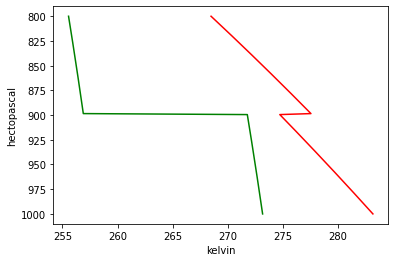

In [4]:
plt.plot(figsize=(7,10))

plt.plot(profile.temperature, profile.pressure, 'r-', label='temperature')
plt.plot(profile.dew_point, profile.pressure, 'g-', label = 'dewpoint')

plt.gca().invert_yaxis()
plt.show()

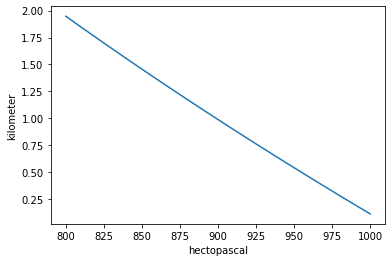

In [6]:
plt.plot(profile.pressure, profile.altitude)
plt.show()